# Description

Runs k-means on the z_score_std version of the data.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

2

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=2
env: OPEN_BLAS_NUM_THREADS=2
env: NUMEXPR_NUM_THREADS=2
env: OMP_NUM_THREADS=2


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
np.random.seed(0)

In [6]:
INITIAL_RANDOM_STATE = 0

## Input data

In [7]:
INPUT_SUBSET = "z_score_std"

In [8]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [9]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

## Clustering

In [10]:
from sklearn.cluster import KMeans

In [11]:
CLUSTERING_ATTRIBUTES_TO_SAVE = ["n_clusters"]

In [12]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_MIN"] = 2
CLUSTERING_OPTIONS["K_MAX"] = 60  # sqrt(3749)
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["KMEANS_N_INIT"] = 10

display(CLUSTERING_OPTIONS)

{'K_MIN': 2, 'K_MAX': 60, 'N_REPS_PER_K': 5, 'KMEANS_N_INIT': 10}

In [13]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in range(CLUSTERING_OPTIONS["K_MIN"], CLUSTERING_OPTIONS["K_MAX"] + 1):
    for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
        clus = KMeans(
            n_clusters=k,
            n_init=CLUSTERING_OPTIONS["KMEANS_N_INIT"],
            random_state=random_state,
        )

        method_name = type(clus).__name__
        CLUSTERERS[f"{method_name} #{idx}"] = clus

        random_state = random_state + 1
        idx = idx + 1

In [14]:
display(len(CLUSTERERS))

295

In [15]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('KMeans #0', KMeans(n_clusters=2, random_state=0))

('KMeans #1', KMeans(n_clusters=2, random_state=1))

In [16]:
clustering_method_name = method_name
display(clustering_method_name)

'KMeans'

## Output directory

In [17]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["CLUSTERING_RUNS_DIR"],
    f"{INPUT_SUBSET}-{INPUT_STEM}",
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores')

# Load input file

In [18]:
data = pd.read_pickle(input_filepath)

In [19]:
data.shape

(3749, 987)

In [20]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.553743,1.851060,-0.095721,0.931603,-0.515196,1.371264,-0.413165,0.729668,0.546338,0.901153,...,1.148776,1.649018,-1.375952,2.203063,0.810199,-0.987048,0.277710,-0.607613,0.572376,-0.660846
100002_raw-Energy,-1.313905,-0.421015,-0.310524,-0.201978,0.233028,0.693838,0.084129,0.572439,0.217866,1.296973,...,0.165430,0.799276,-0.361989,-0.008253,2.063780,-0.930765,-0.147007,1.601938,-0.273553,-0.560822
100003_raw-Protein,-0.645622,-0.997845,0.249039,0.256499,0.422357,0.829189,-0.169004,0.511550,0.002389,-0.057200,...,1.016791,1.019488,-2.148844,-0.065130,0.041052,-0.836118,-0.320571,1.325519,-0.341494,-0.495786
100004_raw-Fat,-0.913924,-1.837183,0.012095,-1.301315,0.205794,1.129114,0.019985,0.376660,-0.810272,0.843611,...,0.544266,0.576714,0.281731,-0.218963,1.258957,-1.131924,0.378545,0.842047,-0.622194,-0.160058
100005_raw-Carbohydrate,-0.523004,0.131379,-0.097802,-0.030526,-0.021500,-0.219116,0.668229,0.365700,1.102347,0.845625,...,-0.344740,0.079274,0.253427,0.236474,1.033895,-0.229105,0.364793,1.776714,0.190531,-1.459641


In [21]:
assert not data.isna().any().any()

# Clustering

## Generate ensemble

In [22]:
from clustering.ensembles.utils import generate_ensemble

In [23]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=CLUSTERING_ATTRIBUTES_TO_SAVE,
)

  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 1/295 [00:00<02:33,  1.92it/s]

  1%|          | 2/295 [00:01<02:34,  1.90it/s]

  1%|          | 3/295 [00:01<02:32,  1.92it/s]

  1%|▏         | 4/295 [00:02<02:32,  1.91it/s]

  2%|▏         | 5/295 [00:02<02:29,  1.93it/s]

  2%|▏         | 6/295 [00:03<02:56,  1.64it/s]

  2%|▏         | 7/295 [00:04<03:04,  1.56it/s]

  3%|▎         | 8/295 [00:04<03:18,  1.45it/s]

  3%|▎         | 9/295 [00:05<03:30,  1.36it/s]

  3%|▎         | 10/295 [00:06<03:36,  1.31it/s]

  4%|▎         | 11/295 [00:08<05:03,  1.07s/it]

  4%|▍         | 12/295 [00:09<05:29,  1.16s/it]

  4%|▍         | 13/295 [00:11<06:14,  1.33s/it]

  5%|▍         | 14/295 [00:13<07:10,  1.53s/it]

  5%|▌         | 15/295 [00:15<07:38,  1.64s/it]

  5%|▌         | 16/295 [00:17<08:23,  1.80s/it]

  6%|▌         | 17/295 [00:20<09:28,  2.05s/it]

  6%|▌         | 18/295 [00:22<10:22,  2.25s/it]

  6%|▋         | 19/295 [00:25<10:57,  2.38s/it]

  7%|▋         | 20/295 [00:27<10:53,  2.37s/it]

  7%|▋         | 21/295 [00:31<12:36,  2.76s/it]

  7%|▋         | 22/295 [00:35<13:43,  3.02s/it]

  8%|▊         | 23/295 [00:38<14:08,  3.12s/it]

  8%|▊         | 24/295 [00:42<14:30,  3.21s/it]

  8%|▊         | 25/295 [00:45<14:09,  3.15s/it]

  9%|▉         | 26/295 [00:48<14:59,  3.35s/it]

  9%|▉         | 27/295 [00:52<15:43,  3.52s/it]

  9%|▉         | 28/295 [00:56<15:46,  3.55s/it]

 10%|▉         | 29/295 [00:59<15:10,  3.42s/it]

 10%|█         | 30/295 [01:02<15:00,  3.40s/it]

 11%|█         | 31/295 [01:06<14:49,  3.37s/it]

 11%|█         | 32/295 [01:10<15:36,  3.56s/it]

 11%|█         | 33/295 [01:13<15:20,  3.51s/it]

 12%|█▏        | 34/295 [01:17<15:23,  3.54s/it]

 12%|█▏        | 35/295 [01:20<14:32,  3.36s/it]

 12%|█▏        | 36/295 [01:24<15:15,  3.53s/it]

 13%|█▎        | 37/295 [01:27<14:56,  3.48s/it]

 13%|█▎        | 38/295 [01:30<14:45,  3.44s/it]

 13%|█▎        | 39/295 [01:34<14:40,  3.44s/it]

 14%|█▎        | 40/295 [01:37<13:50,  3.26s/it]

 14%|█▍        | 41/295 [01:40<13:50,  3.27s/it]

 14%|█▍        | 42/295 [01:43<13:13,  3.14s/it]

 15%|█▍        | 43/295 [01:46<13:00,  3.10s/it]

 15%|█▍        | 44/295 [01:49<13:05,  3.13s/it]

 15%|█▌        | 45/295 [01:52<13:39,  3.28s/it]

 16%|█▌        | 46/295 [01:56<14:13,  3.43s/it]

 16%|█▌        | 47/295 [01:59<13:38,  3.30s/it]

 16%|█▋        | 48/295 [02:02<13:28,  3.27s/it]

 17%|█▋        | 49/295 [02:06<13:09,  3.21s/it]

 17%|█▋        | 50/295 [02:09<13:45,  3.37s/it]

 17%|█▋        | 51/295 [02:13<13:49,  3.40s/it]

 18%|█▊        | 52/295 [02:16<13:33,  3.35s/it]

 18%|█▊        | 53/295 [02:19<13:19,  3.30s/it]

 18%|█▊        | 54/295 [02:23<14:06,  3.51s/it]

 19%|█▊        | 55/295 [02:27<14:34,  3.64s/it]

 19%|█▉        | 56/295 [02:31<14:21,  3.61s/it]

 19%|█▉        | 57/295 [02:35<14:54,  3.76s/it]

 20%|█▉        | 58/295 [02:39<14:55,  3.78s/it]

 20%|██        | 59/295 [02:42<15:01,  3.82s/it]

 20%|██        | 60/295 [02:46<14:18,  3.65s/it]

 21%|██        | 61/295 [02:49<14:20,  3.68s/it]

 21%|██        | 62/295 [02:53<14:04,  3.62s/it]

 21%|██▏       | 63/295 [02:57<14:02,  3.63s/it]

 22%|██▏       | 64/295 [03:01<14:23,  3.74s/it]

 22%|██▏       | 65/295 [03:04<14:28,  3.78s/it]

 22%|██▏       | 66/295 [03:08<14:19,  3.75s/it]

 23%|██▎       | 67/295 [03:12<14:19,  3.77s/it]

 23%|██▎       | 68/295 [03:16<14:47,  3.91s/it]

 23%|██▎       | 69/295 [03:20<14:42,  3.90s/it]

 24%|██▎       | 70/295 [03:24<14:16,  3.81s/it]

 24%|██▍       | 71/295 [03:28<14:50,  3.97s/it]

 24%|██▍       | 72/295 [03:32<14:30,  3.90s/it]

 25%|██▍       | 73/295 [03:36<14:21,  3.88s/it]

 25%|██▌       | 74/295 [03:39<14:11,  3.85s/it]

 25%|██▌       | 75/295 [03:43<14:21,  3.91s/it]

 26%|██▌       | 76/295 [03:47<14:23,  3.94s/it]

 26%|██▌       | 77/295 [03:51<14:14,  3.92s/it]

 26%|██▋       | 78/295 [03:55<14:03,  3.89s/it]

 27%|██▋       | 79/295 [04:00<14:33,  4.04s/it]

 27%|██▋       | 80/295 [04:04<14:31,  4.05s/it]

 27%|██▋       | 81/295 [04:08<14:26,  4.05s/it]

 28%|██▊       | 82/295 [04:12<14:33,  4.10s/it]

 28%|██▊       | 83/295 [04:16<14:15,  4.03s/it]

 28%|██▊       | 84/295 [04:20<14:11,  4.03s/it]

 29%|██▉       | 85/295 [04:24<14:00,  4.00s/it]

 29%|██▉       | 86/295 [04:28<14:36,  4.19s/it]

 29%|██▉       | 87/295 [04:32<14:13,  4.10s/it]

 30%|██▉       | 88/295 [04:36<14:14,  4.13s/it]

 30%|███       | 89/295 [04:41<14:09,  4.13s/it]

 31%|███       | 90/295 [04:44<13:52,  4.06s/it]

 31%|███       | 91/295 [04:49<14:26,  4.25s/it]

 31%|███       | 92/295 [04:53<14:06,  4.17s/it]

 32%|███▏      | 93/295 [04:58<14:14,  4.23s/it]

 32%|███▏      | 94/295 [05:02<14:26,  4.31s/it]

 32%|███▏      | 95/295 [05:06<14:16,  4.28s/it]

 33%|███▎      | 96/295 [05:11<14:53,  4.49s/it]

 33%|███▎      | 97/295 [05:16<14:57,  4.53s/it]

 33%|███▎      | 98/295 [05:20<14:43,  4.48s/it]

 34%|███▎      | 99/295 [05:25<14:29,  4.44s/it]

 34%|███▍      | 100/295 [05:29<14:21,  4.42s/it]

 34%|███▍      | 101/295 [05:33<14:21,  4.44s/it]

 35%|███▍      | 102/295 [05:38<14:12,  4.42s/it]

 35%|███▍      | 103/295 [05:42<14:22,  4.49s/it]

 35%|███▌      | 104/295 [05:47<14:15,  4.48s/it]

 36%|███▌      | 105/295 [05:51<14:02,  4.43s/it]

 36%|███▌      | 106/295 [05:56<14:02,  4.46s/it]

 36%|███▋      | 107/295 [06:00<14:10,  4.52s/it]

 37%|███▋      | 108/295 [06:05<13:58,  4.48s/it]

 37%|███▋      | 109/295 [06:09<13:48,  4.46s/it]

 37%|███▋      | 110/295 [06:14<13:45,  4.46s/it]

 38%|███▊      | 111/295 [06:18<13:38,  4.45s/it]

 38%|███▊      | 112/295 [06:23<13:44,  4.50s/it]

 38%|███▊      | 113/295 [06:28<14:02,  4.63s/it]

 39%|███▊      | 114/295 [06:32<13:51,  4.59s/it]

 39%|███▉      | 115/295 [06:37<13:43,  4.57s/it]

 39%|███▉      | 116/295 [06:41<13:34,  4.55s/it]

 40%|███▉      | 117/295 [06:46<13:41,  4.62s/it]

 40%|████      | 118/295 [06:51<14:11,  4.81s/it]

 40%|████      | 119/295 [06:56<14:12,  4.84s/it]

 41%|████      | 120/295 [07:01<13:44,  4.71s/it]

 41%|████      | 121/295 [07:05<13:27,  4.64s/it]

 41%|████▏     | 122/295 [07:10<13:27,  4.67s/it]

 42%|████▏     | 123/295 [07:14<13:18,  4.64s/it]

 42%|████▏     | 124/295 [07:19<13:16,  4.66s/it]

 42%|████▏     | 125/295 [07:24<13:07,  4.63s/it]

 43%|████▎     | 126/295 [07:29<13:26,  4.77s/it]

 43%|████▎     | 127/295 [07:34<13:32,  4.83s/it]

 43%|████▎     | 128/295 [07:38<13:25,  4.82s/it]

 44%|████▎     | 129/295 [07:43<13:13,  4.78s/it]

 44%|████▍     | 130/295 [07:48<13:36,  4.95s/it]

 44%|████▍     | 131/295 [07:53<13:17,  4.86s/it]

 45%|████▍     | 132/295 [07:58<13:23,  4.93s/it]

 45%|████▌     | 133/295 [08:03<13:27,  4.98s/it]

 45%|████▌     | 134/295 [08:09<13:34,  5.06s/it]

 46%|████▌     | 135/295 [08:14<13:24,  5.03s/it]

 46%|████▌     | 136/295 [08:18<13:12,  4.98s/it]

 46%|████▋     | 137/295 [08:24<13:25,  5.10s/it]

 47%|████▋     | 138/295 [08:29<13:11,  5.04s/it]

 47%|████▋     | 139/295 [08:34<13:12,  5.08s/it]

 47%|████▋     | 140/295 [08:38<12:46,  4.94s/it]

 48%|████▊     | 141/295 [08:44<12:53,  5.02s/it]

 48%|████▊     | 142/295 [08:48<12:31,  4.91s/it]

 48%|████▊     | 143/295 [08:53<12:30,  4.93s/it]

 49%|████▉     | 144/295 [08:58<12:25,  4.94s/it]

 49%|████▉     | 145/295 [09:03<12:20,  4.93s/it]

 49%|████▉     | 146/295 [09:08<12:10,  4.90s/it]

 50%|████▉     | 147/295 [09:13<12:18,  4.99s/it]

 50%|█████     | 148/295 [09:19<12:28,  5.09s/it]

 51%|█████     | 149/295 [09:23<12:08,  4.99s/it]

 51%|█████     | 150/295 [09:28<12:06,  5.01s/it]

 51%|█████     | 151/295 [09:34<12:08,  5.06s/it]

 52%|█████▏    | 152/295 [09:39<12:19,  5.17s/it]

 52%|█████▏    | 153/295 [09:44<12:18,  5.20s/it]

 52%|█████▏    | 154/295 [09:50<12:17,  5.23s/it]

 53%|█████▎    | 155/295 [09:54<12:00,  5.14s/it]

 53%|█████▎    | 156/295 [10:00<12:13,  5.27s/it]

 53%|█████▎    | 157/295 [10:05<12:14,  5.32s/it]

 54%|█████▎    | 158/295 [10:11<12:06,  5.30s/it]

 54%|█████▍    | 159/295 [10:16<12:11,  5.38s/it]

 54%|█████▍    | 160/295 [10:21<11:55,  5.30s/it]

 55%|█████▍    | 161/295 [10:27<11:54,  5.34s/it]

 55%|█████▍    | 162/295 [10:32<11:44,  5.30s/it]

 55%|█████▌    | 163/295 [10:38<11:46,  5.35s/it]

 56%|█████▌    | 164/295 [10:43<11:26,  5.24s/it]

 56%|█████▌    | 165/295 [10:48<11:28,  5.29s/it]

 56%|█████▋    | 166/295 [10:54<11:33,  5.38s/it]

 57%|█████▋    | 167/295 [10:59<11:47,  5.53s/it]

 57%|█████▋    | 168/295 [11:05<11:45,  5.56s/it]

 57%|█████▋    | 169/295 [11:11<11:44,  5.59s/it]

 58%|█████▊    | 170/295 [11:16<11:47,  5.66s/it]

 58%|█████▊    | 171/295 [11:22<11:32,  5.59s/it]

 58%|█████▊    | 172/295 [11:27<11:24,  5.57s/it]

 59%|█████▊    | 173/295 [11:33<11:12,  5.51s/it]

 59%|█████▉    | 174/295 [11:38<11:09,  5.53s/it]

 59%|█████▉    | 175/295 [11:44<10:59,  5.49s/it]

 60%|█████▉    | 176/295 [11:49<10:54,  5.50s/it]

 60%|██████    | 177/295 [11:55<10:47,  5.49s/it]

 60%|██████    | 178/295 [12:01<10:52,  5.58s/it]

 61%|██████    | 179/295 [12:06<10:49,  5.60s/it]

 61%|██████    | 180/295 [12:12<10:37,  5.55s/it]

 61%|██████▏   | 181/295 [12:17<10:38,  5.60s/it]

 62%|██████▏   | 182/295 [12:23<10:30,  5.58s/it]

 62%|██████▏   | 183/295 [12:29<10:27,  5.60s/it]

 62%|██████▏   | 184/295 [12:35<10:33,  5.71s/it]

 63%|██████▎   | 185/295 [12:40<10:32,  5.75s/it]

 63%|██████▎   | 186/295 [12:46<10:27,  5.76s/it]

 63%|██████▎   | 187/295 [12:52<10:37,  5.90s/it]

 64%|██████▎   | 188/295 [12:58<10:34,  5.93s/it]

 64%|██████▍   | 189/295 [13:04<10:25,  5.90s/it]

 64%|██████▍   | 190/295 [13:11<10:39,  6.09s/it]

 65%|██████▍   | 191/295 [13:17<10:32,  6.08s/it]

 65%|██████▌   | 192/295 [13:23<10:28,  6.10s/it]

 65%|██████▌   | 193/295 [13:29<10:30,  6.18s/it]

 66%|██████▌   | 194/295 [13:35<10:09,  6.03s/it]

 66%|██████▌   | 195/295 [13:41<09:50,  5.90s/it]

 66%|██████▋   | 196/295 [13:46<09:40,  5.87s/it]

 67%|██████▋   | 197/295 [13:52<09:20,  5.72s/it]

 67%|██████▋   | 198/295 [13:58<09:17,  5.75s/it]

 67%|██████▋   | 199/295 [14:04<09:22,  5.86s/it]

 68%|██████▊   | 200/295 [14:09<09:11,  5.80s/it]

 68%|██████▊   | 201/295 [14:15<09:12,  5.88s/it]

 68%|██████▊   | 202/295 [14:21<09:10,  5.92s/it]

 69%|██████▉   | 203/295 [14:27<09:02,  5.90s/it]

 69%|██████▉   | 204/295 [14:33<08:58,  5.91s/it]

 69%|██████▉   | 205/295 [14:39<08:50,  5.89s/it]

 70%|██████▉   | 206/295 [14:45<08:49,  5.95s/it]

 70%|███████   | 207/295 [14:52<08:59,  6.13s/it]

 71%|███████   | 208/295 [14:58<08:49,  6.09s/it]

 71%|███████   | 209/295 [15:03<08:34,  5.98s/it]

 71%|███████   | 210/295 [15:09<08:27,  5.97s/it]

 72%|███████▏  | 211/295 [15:16<08:30,  6.07s/it]

 72%|███████▏  | 212/295 [15:22<08:25,  6.10s/it]

 72%|███████▏  | 213/295 [15:28<08:29,  6.21s/it]

 73%|███████▎  | 214/295 [15:35<08:24,  6.23s/it]

 73%|███████▎  | 215/295 [15:41<08:20,  6.26s/it]

 73%|███████▎  | 216/295 [15:47<08:21,  6.34s/it]

 74%|███████▎  | 217/295 [15:54<08:09,  6.27s/it]

 74%|███████▍  | 218/295 [16:00<07:57,  6.21s/it]

 74%|███████▍  | 219/295 [16:06<07:53,  6.22s/it]

 75%|███████▍  | 220/295 [16:12<07:44,  6.19s/it]

 75%|███████▍  | 221/295 [16:19<07:45,  6.29s/it]

 75%|███████▌  | 222/295 [16:25<07:34,  6.23s/it]

 76%|███████▌  | 223/295 [16:31<07:27,  6.21s/it]

 76%|███████▌  | 224/295 [16:37<07:25,  6.27s/it]

 76%|███████▋  | 225/295 [16:43<07:12,  6.18s/it]

 77%|███████▋  | 226/295 [16:50<07:11,  6.26s/it]

 77%|███████▋  | 227/295 [16:56<07:09,  6.31s/it]

 77%|███████▋  | 228/295 [17:02<07:02,  6.31s/it]

 78%|███████▊  | 229/295 [17:09<06:55,  6.30s/it]

 78%|███████▊  | 230/295 [17:15<06:46,  6.25s/it]

 78%|███████▊  | 231/295 [17:21<06:44,  6.32s/it]

 79%|███████▊  | 232/295 [17:28<06:42,  6.38s/it]

 79%|███████▉  | 233/295 [17:34<06:36,  6.39s/it]

 79%|███████▉  | 234/295 [17:41<06:33,  6.45s/it]

 80%|███████▉  | 235/295 [17:47<06:30,  6.51s/it]

 80%|████████  | 236/295 [17:54<06:25,  6.54s/it]

 80%|████████  | 237/295 [18:01<06:27,  6.67s/it]

 81%|████████  | 238/295 [18:07<06:16,  6.61s/it]

 81%|████████  | 239/295 [18:14<06:08,  6.59s/it]

 81%|████████▏ | 240/295 [18:21<06:03,  6.62s/it]

 82%|████████▏ | 241/295 [18:27<05:57,  6.63s/it]

 82%|████████▏ | 242/295 [18:34<05:48,  6.58s/it]

 82%|████████▏ | 243/295 [18:40<05:42,  6.59s/it]

 83%|████████▎ | 244/295 [18:47<05:37,  6.61s/it]

 83%|████████▎ | 245/295 [18:54<05:31,  6.64s/it]

 83%|████████▎ | 246/295 [19:00<05:24,  6.62s/it]

 84%|████████▎ | 247/295 [19:07<05:20,  6.67s/it]

 84%|████████▍ | 248/295 [19:14<05:13,  6.68s/it]

 84%|████████▍ | 249/295 [19:21<05:07,  6.68s/it]

 85%|████████▍ | 250/295 [19:27<04:59,  6.66s/it]

 85%|████████▌ | 251/295 [19:34<04:53,  6.66s/it]

 85%|████████▌ | 252/295 [19:40<04:46,  6.67s/it]

 86%|████████▌ | 253/295 [19:47<04:41,  6.70s/it]

 86%|████████▌ | 254/295 [19:54<04:35,  6.72s/it]

 86%|████████▋ | 255/295 [20:01<04:27,  6.70s/it]

 87%|████████▋ | 256/295 [20:08<04:24,  6.78s/it]

 87%|████████▋ | 257/295 [20:14<04:17,  6.79s/it]

 87%|████████▋ | 258/295 [20:21<04:11,  6.79s/it]

 88%|████████▊ | 259/295 [20:28<04:07,  6.86s/it]

 88%|████████▊ | 260/295 [20:35<03:58,  6.82s/it]

 88%|████████▊ | 261/295 [20:42<03:54,  6.90s/it]

 89%|████████▉ | 262/295 [20:49<03:47,  6.91s/it]

 89%|████████▉ | 263/295 [20:56<03:44,  7.01s/it]

 89%|████████▉ | 264/295 [21:03<03:38,  7.06s/it]

 90%|████████▉ | 265/295 [21:10<03:30,  7.03s/it]

 90%|█████████ | 266/295 [21:17<03:23,  7.01s/it]

 91%|█████████ | 267/295 [21:24<03:16,  7.03s/it]

 91%|█████████ | 268/295 [21:32<03:11,  7.11s/it]

 91%|█████████ | 269/295 [21:39<03:02,  7.04s/it]

 92%|█████████▏| 270/295 [21:46<02:58,  7.13s/it]

 92%|█████████▏| 271/295 [21:53<02:51,  7.14s/it]

 92%|█████████▏| 272/295 [22:00<02:44,  7.16s/it]

 93%|█████████▎| 273/295 [22:08<02:37,  7.18s/it]

 93%|█████████▎| 274/295 [22:15<02:30,  7.19s/it]

 93%|█████████▎| 275/295 [22:22<02:24,  7.23s/it]

 94%|█████████▎| 276/295 [22:29<02:17,  7.24s/it]

 94%|█████████▍| 277/295 [22:37<02:10,  7.28s/it]

 94%|█████████▍| 278/295 [22:44<02:03,  7.26s/it]

 95%|█████████▍| 279/295 [22:51<01:55,  7.23s/it]

 95%|█████████▍| 280/295 [22:58<01:48,  7.24s/it]

 95%|█████████▌| 281/295 [23:06<01:41,  7.27s/it]

 96%|█████████▌| 282/295 [23:13<01:34,  7.26s/it]

 96%|█████████▌| 283/295 [23:20<01:27,  7.33s/it]

 96%|█████████▋| 284/295 [23:28<01:20,  7.32s/it]

 97%|█████████▋| 285/295 [23:35<01:13,  7.33s/it]

 97%|█████████▋| 286/295 [23:43<01:06,  7.40s/it]

 97%|█████████▋| 287/295 [23:50<00:59,  7.42s/it]

 98%|█████████▊| 288/295 [23:58<00:52,  7.43s/it]

 98%|█████████▊| 289/295 [24:05<00:44,  7.41s/it]

 98%|█████████▊| 290/295 [24:12<00:36,  7.39s/it]

 99%|█████████▊| 291/295 [24:20<00:29,  7.39s/it]

 99%|█████████▉| 292/295 [24:27<00:22,  7.44s/it]

 99%|█████████▉| 293/295 [24:35<00:15,  7.54s/it]

100%|█████████▉| 294/295 [24:42<00:07,  7.51s/it]

100%|██████████| 295/295 [24:50<00:00,  7.51s/it]

100%|██████████| 295/295 [24:50<00:00,  5.05s/it]

In [24]:
# the number should be close to 295 (the number of partitions generated by k-means/spectral clustering)
ensemble.shape

(295, 3)

In [25]:
ensemble.head()

,clusterer_params,partition,n_clusters
clusterer_id,,,
KMeans #0,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
KMeans #1,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
KMeans #2,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
KMeans #3,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
KMeans #4,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2


In [26]:
ensemble["n_clusters"].value_counts().head()

60    5
16    5
28    5
27    5
26    5
Name: n_clusters, dtype: int64

In [27]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    295.000000
mean      31.000000
std       17.058323
min        2.000000
25%       16.000000
50%       31.000000
75%       46.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [28]:
assert ensemble_stats["min"] > 1

In [29]:
assert not ensemble["n_clusters"].isna().any()

In [30]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [31]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [32]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

## Add clustering quality measures

In [33]:
from sklearn.metrics import calinski_harabasz_score

In [34]:
ensemble = ensemble.assign(
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x))
)

In [35]:
ensemble.shape

(295, 4)

In [36]:
ensemble.head()

,clusterer_params,partition,n_clusters,ch_score
clusterer_id,,,,
KMeans #0,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,209.908957
KMeans #1,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,209.908957
KMeans #2,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,209.908957
KMeans #3,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,209.908957
KMeans #4,"{'algorithm': 'auto', 'copy_x': True, 'init': ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,209.908957


## Save

In [37]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores/KMeans-KMEANS_N_INIT_10-K_MAX_60-K_MIN_2-N_REPS_PER_K_5.pkl')

In [38]:
ensemble.to_pickle(output_filename)

# Cluster quality

In [39]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters"]).mean()
    display(_df)

,ch_score
n_clusters,
2,209.908957
3,136.151469
4,111.570816
5,90.206647
6,76.760695
7,67.318693
8,60.288481
9,54.374755
10,51.205675


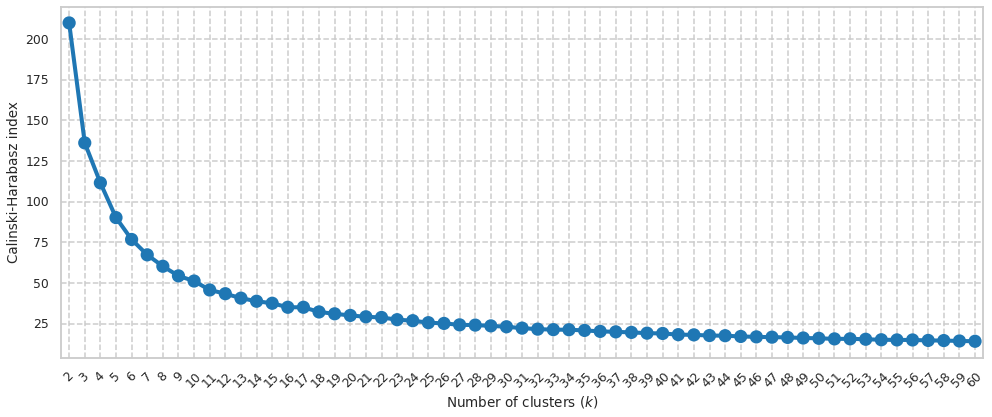

In [40]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score")
    ax.set_ylabel("Calinski-Harabasz index")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [41]:
parts = ensemble.groupby("n_clusters").apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [42]:
parts.head()

n_clusters
2    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
3    [[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...
4    [[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...
5    [[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...
6    [[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...
dtype: object

In [43]:
assert np.all(
    [
        parts.loc[k].shape == (CLUSTERING_OPTIONS["N_REPS_PER_K"], data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [44]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [45]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="k"
)

In [46]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

2     1.000000
4     0.999930
3     0.978411
5     0.947089
7     0.946978
6     0.864657
8     0.656955
9     0.335216
12    0.188464
10    0.186006
11    0.171345
15    0.155128
13    0.132850
14    0.129988
17    0.129620
Name: k, dtype: float64

In [47]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)

In [48]:
parts_ari_df.shape

(59, 10)

In [49]:
assert (
    int(
        (CLUSTERING_OPTIONS["N_REPS_PER_K"] * (CLUSTERING_OPTIONS["N_REPS_PER_K"] - 1))
        / 2
    )
    == parts_ari_df.shape[1]
)

In [50]:
parts_ari_df.head()

,0,1,2,3,4,5,6,7,8,9
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.994362,0.994362,0.948876,0.999807,1.000000,0.954285,0.994548,0.954285,0.994548,0.949037
4,1.000000,0.999825,1.000000,1.000000,0.999825,1.000000,1.000000,0.999825,0.999825,1.000000
5,0.875863,0.887689,0.875863,0.875863,0.985206,1.000000,1.000000,0.985206,0.985206,1.000000
6,0.687767,0.977985,0.977524,0.977937,0.675709,0.675443,0.675672,0.999306,0.999886,0.999337


## Save

In [51]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-stability-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores/KMeans-stability-KMEANS_N_INIT_10-K_MAX_60-K_MIN_2-N_REPS_PER_K_5.pkl')

In [52]:
parts_ari_df.to_pickle(output_filename)

## Stability plot

In [53]:
parts_ari_df_plot = (
    parts_ari_df.stack()
    .reset_index()
    .rename(columns={"level_0": "k", "level_1": "idx", 0: "ari"})
)

In [54]:
parts_ari_df_plot.dtypes

k        int64
idx      int64
ari    float64
dtype: object

In [55]:
parts_ari_df_plot.head()

,k,idx,ari
0,2,0,1.0
1,2,1,1.0
2,2,2,1.0
3,2,3,1.0
4,2,4,1.0


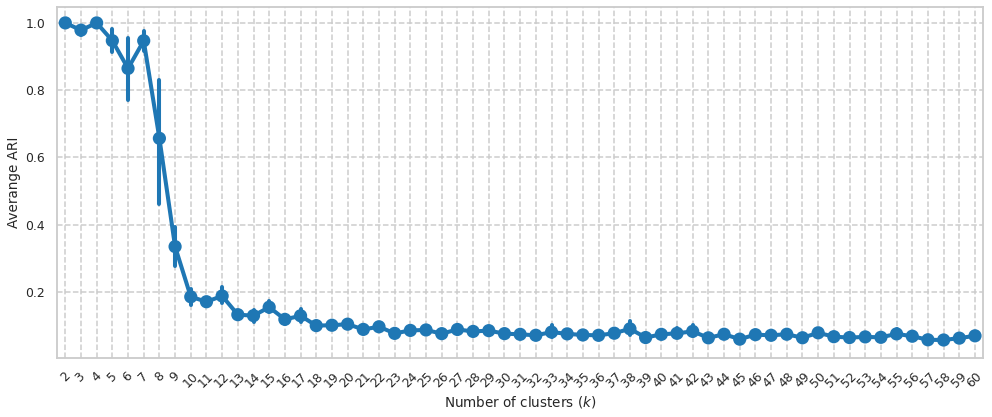

In [56]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="k", y="ari")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()